In [8]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("Jisdoredit1.csv", parse_dates = True, index_col = 0)
train = df['Rate'][:505].to_numpy()
test = df['Rate'][500:].to_numpy()
sc = MinMaxScaler(feature_range=(0,1))
train = sc.fit_transform(train.reshape(-1,1))
test = sc.transform(test.reshape(-1,1))

def data_preparation(data):
    x = []
    y = []
    
    for i in range(5, len(data)):
        x.append(data[i-5:i, 0])
        y.append(data[i])
    x, y = np.array(x), np.array(y)
    
    x = np.reshape(x, (x.shape[0], x.shape[1], 1))
    return x, y

x_train, y_train = data_preparation(train)
x_test, y_test = data_preparation(test)

model = Sequential()
model.add(LSTM(units=15, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=5))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer = 'adam', loss ='mean_squared_error', metrics=['accuracy'])
model.fit(x_train, y_train, epochs = 50, batch_size = 4)

Epoch 1/50
125/125 [==============================] - 6s 14ms/step - loss: 0.0277 - accuracy: 0.0020
Epoch 2/50
125/125 [==============================] - 2s 14ms/step - loss: 0.0091 - accuracy: 0.0040
Epoch 3/50
125/125 [==============================] - 2s 14ms/step - loss: 0.0080 - accuracy: 0.0040
Epoch 4/50
125/125 [==============================] - 2s 14ms/step - loss: 0.0074 - accuracy: 0.0040
Epoch 5/50
125/125 [==============================] - 2s 14ms/step - loss: 0.0070 - accuracy: 0.0020
Epoch 6/50
125/125 [==============================] - 2s 14ms/step - loss: 0.0055 - accuracy: 0.0040
Epoch 7/50
125/125 [==============================] - 2s 13ms/step - loss: 0.0049 - accuracy: 0.0040
Epoch 8/50
125/125 [==============================] - 2s 14ms/step - loss: 0.0055 - accuracy: 0.0040
Epoch 9/50
125/125 [==============================] - 2s 14ms/step - loss: 0.0049 - accuracy: 0.0040
Epoch 10/50
125/125 [==============================] - 2s 13ms/step - loss: 0.0054 - accura

2/2 [==============================] - 2s 8ms/step


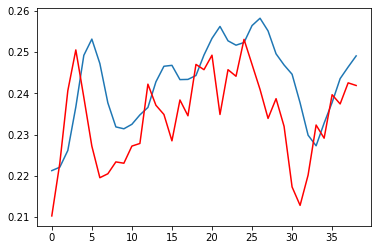

In [9]:
y_pred = model.predict(x_test)
fig, ax = plt.subplots()
ax.plot(y_pred)
ax.plot(y_test, c = 'r')

<function matplotlib.pyplot.show(close=None, block=None)>

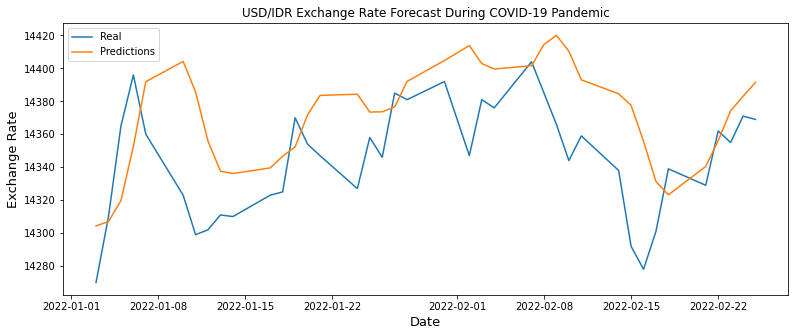

In [10]:
y_pred = sc.inverse_transform(y_pred)
pd.options.mode.chained_assignment = None

dtrain = df[:505]
valid = df[505:]
valid['Predictions'] = y_pred

plt.figure(figsize=(13,5))
plt.title('USD/IDR Exchange Rate Forecast During COVID-19 Pandemic')
plt.xlabel('Date', fontsize = 13)
plt.ylabel('Exchange Rate', fontsize = 13)
plt.plot(valid[['Rate', 'Predictions']])
plt.legend(['Real', 'Predictions'], loc = 'upper left')
plt.show

In [4]:
newtest = df['Rate'][505:].to_numpy()

In [11]:
rmse = np.sqrt(np.mean((y_pred - newtest)**2))
rmse

52.26862981898037

In [12]:
mape = np.mean(np.abs((newtest - y_pred)/ newtest))*100
mape

0.2950494281774152

In [13]:
mse = np.square(np.subtract(newtest,y_pred)).mean()
mse

2732.009663153604